### Import Libraries

In [1]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
import statsmodels.api as sm
import seaborn as sns
import numpy as np
from time import time

### Read Data

In [2]:
df = pd.read_csv("./data/transformed_data.csv")
df

,age,bmi,children,smoker,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0.680919,1,0,0,0,0,1
1,18,33.770,1,0,-1.751785,0,1,0,0,1,0
2,28,33.000,3,0,-0.770779,0,1,0,0,1,0
3,33,22.705,0,0,0.978309,0,1,0,1,0,0
4,32,28.880,0,0,-0.918699,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1332,50,30.970,3,0,0.164599,0,1,0,1,0,0
1333,18,31.920,0,0,-1.501296,1,0,1,0,0,0
1334,18,36.850,0,0,-1.809599,1,0,0,0,1,0
1335,21,25.800,0,0,-1.597538,1,0,0,0,0,1


### GridSearchCV Report

In [3]:
# function for performing grid search
def gridSearchReport(estimator, X, y, params, cv=None):
    t0 = time()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # train tets split
    
    gridSearchCV = GridSearchCV(
        estimator, 
        param_grid=params, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    gridSearchCV.fit(X_train, y_train)
    
    print("Best parameters:", gridSearchCV.best_params_)
    print("Best CV score:", abs(gridSearchCV.best_score_))
    
    y_train_pred, y_test_pred = gridSearchCV.predict(X_train), gridSearchCV.predict(X_test)
    
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),  # evaluation metrics
          ", ", r2_score(y_train, y_train_pred) )
    
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return gridSearchCV    

### Train-Test Split

In [4]:
X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1069, 10), (268, 10), (1069,), (268,))

### Linear Regression

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [6]:
y_predicted_train = lr_model.predict(X_train)
y_predicted_test = lr_model.predict(X_test)

<Axes: ylabel='charges'>

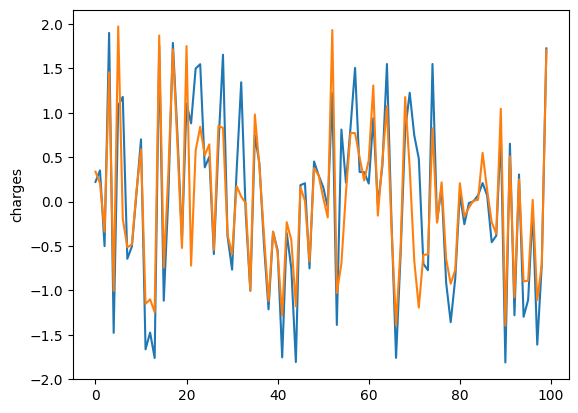

In [7]:
sns.lineplot(x=range(len(y_test[:100])), y=y_test[:100])
sns.lineplot(x=range(len(y_predicted_test[:100])), y=y_predicted_test[:100])

In [8]:
print("Metric on Training Data")
print("MSE:", mean_squared_error(y_train, y_predicted_train))
print("RMSE:", root_mean_squared_error(y_train, y_predicted_train))
print("R2:", r2_score(y_train, y_predicted_train))
print()
print("Metric on Testing Data")
print("MSE:", mean_squared_error(y_test, y_predicted_test))
print("RMSE:", root_mean_squared_error(y_test, y_predicted_test))
print("R2:", r2_score(y_test, y_predicted_test))

Metric on Training Data
MSE: 0.22957929375351702
RMSE: 0.4791443349905298
R2: 0.7699854565436959

Metric on Testing Data
MSE: 0.23147036174856964
RMSE: 0.4811136682204837
R2: 0.769357764802994


In [9]:
residuals_train = y_train - y_predicted_train
residuals_test = y_test - y_predicted_test

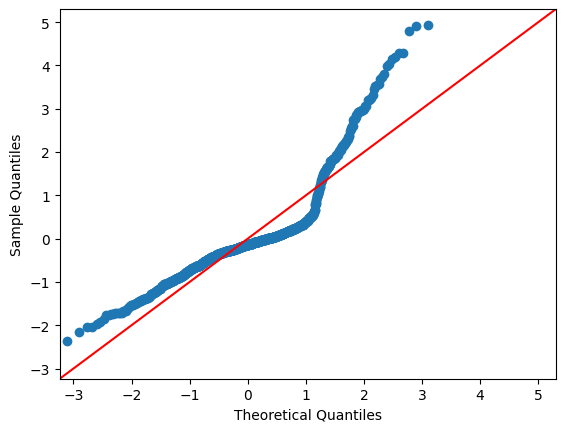

In [10]:
fig = sm.qqplot(
    residuals_train, 
    fit=True, 
    line='45'
)

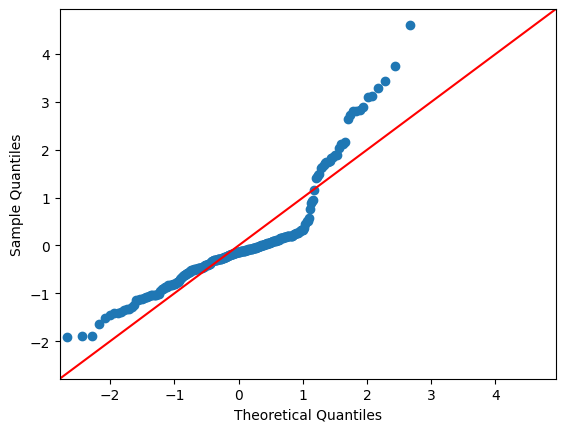

In [11]:
fig = sm.qqplot(
    residuals_test, 
    fit=True, 
    line='45'
)

<Axes: xlabel='charges'>

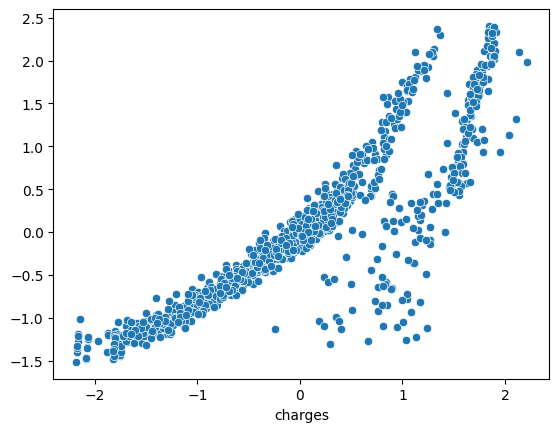

In [12]:
sns.scatterplot(x=y_train, y=y_predicted_train)

<Axes: xlabel='charges'>

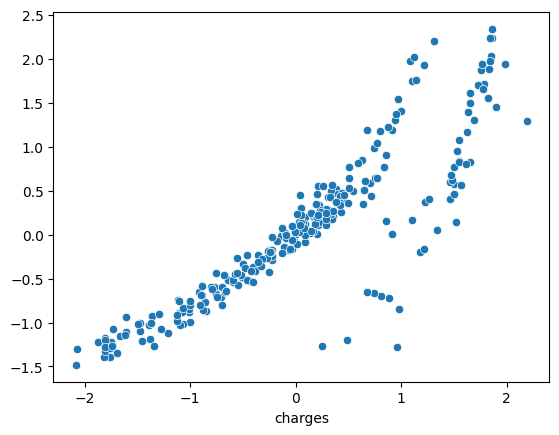

In [13]:
sns.scatterplot(x=y_test, y=y_predicted_test)

### Rigde Regression

In [14]:
ridge_model = gridSearchReport(Ridge(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(0.5336699231206312)}
Best CV score: 0.22520155663894875
MSE, R2 train: 0.22060758427323685 ,  0.7820107111604221
MSE, R2 test: 0.2667153973239533 ,  0.7193612547925348
Elapsed time: 1.52 s , 0.03 min


### Lasso Regression

In [15]:
lasso_model = gridSearchReport(Lasso(), X, y, params={"alpha": np.logspace(-3, 3, 100)})

Best parameters: {'alpha': np.float64(0.001)}
Best CV score: 0.23372748467758137
MSE, R2 train: 0.22655462095418505 ,  0.776123968062312
MSE, R2 test: 0.24217722616012263 ,  0.7452263825861316
Elapsed time: 0.18 s , 0.0 min


### ElasticNet

In [16]:
elasticnet_model = gridSearchReport(ElasticNet(), X, y, params={"alpha": np.linspace(0.1,1,5), "l1_ratio":np.random.rand(20)})

Best parameters: {'alpha': np.float64(0.1), 'l1_ratio': np.float64(0.00556666729948363)}
Best CV score: 0.30953676713670786
MSE, R2 train: 0.30570732871889733 ,  0.6967061719059133
MSE, R2 test: 0.29056149952407595 ,  0.699862111055301
Elapsed time: 0.17 s , 0.0 min


### RandomForest Regressor

In [ ]:
params = {"n_estimators":[10, 20, 30, 50],
         "criterion":["squared_error", "absolute_error", "poisson"],
         "max_depth":[2,3,4],
         "min_samples_split":range(2, 10),
         "min_samples_leaf":[2,3],
         "max_features":range(1, X_train.shape[1]+1)
        }
randomforest_gs = gridSearchReport(RandomForestRegressor(), X, y, params=params)

### KNN Regression

In [ ]:
knn = KNeighborsRegressor() # KNN model
params = {
    "n_neighbors": range(1,16),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_reg = gridSearchReport(KNeighborsRegressor(), X, y, params=params)

### Support Vector Regression

In [ ]:
params = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto'], # Kernel coefficient 
    "C": np.logspace(-3, 3, 10), # Penalty parameter
    "epsilon": np.linspace(.1, 1., 10) # the decision boundary
}
svr_reg = gridSearchReport(SVR(), X, y, params)